## convert image to byte array
- 2.13inch black/white/red
- res 212x104 landscape (right to left/top to bottom)
- 22048 bits = 2756 Bytes (172*16+4)
- 1bit=1pixel send in 1byte=8pixel packets (written as 2-figure hex number)

In [468]:
%reset -f
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

hex2bin = lambda x: bin(int(x, 16))[2:].zfill(8)
bin2hex = lambda x: hex(int(x,2))
dec2hex = lambda x: hex(x)

hex2bin('7') , bin2hex('0b00000111') , dec2hex(7)

('00000111', '0x7', '0x7')

In [469]:
hex(7) , hex(int('111',2)) , format(7, '0x') , format(7, '0x').zfill(2)

('0x7', '0x7', '7', '07')

In [470]:
bin(15) , bin(int('f', 16)) , format(15, 'b') , format(15, 'b').zfill(8)

('0b1111', '0b1111', '1111', '00001111')

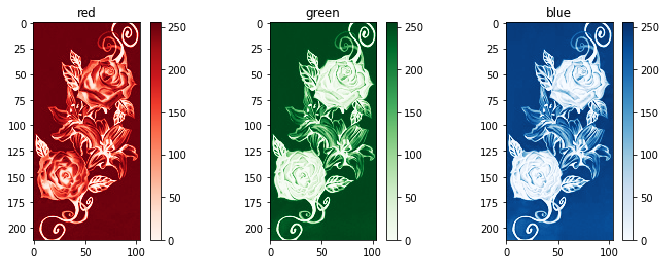

In [471]:
#import image
img = np.array( Image.open("roses.jpg") )

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title('red')
plt.imshow(img[:,:,0], interpolation='nearest', cmap=plt.cm.Reds)
plt.colorbar()
plt.subplot(1,3,2)
plt.title('green')
plt.imshow(img[:,:,1], interpolation='nearest', cmap=plt.cm.Greens)
plt.colorbar()
plt.subplot(1,3,3)
plt.title('blue')
plt.imshow(img[:,:,2], interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

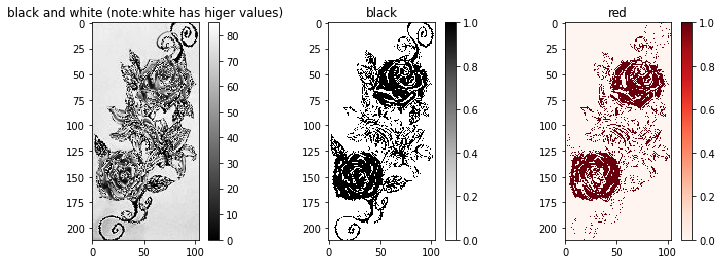

In [472]:
#rgb image
bw = 1/3 * ( img[:,:,0] + img[:,:,1] + img[:,:,2] )

black = 1/2 * ( img[:,:,1] + img[:,:,2] )
red = img[:,:,0] - 3*black
black = (black < 50).astype(int)
red = (red > 30).astype(int)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title('black and white (note:white has higer values)')
plt.imshow(bw, interpolation='nearest', cmap=plt.cm.gray)
plt.colorbar()
plt.subplot(1,3,2)
plt.title('black')
plt.imshow(black, interpolation='nearest', cmap=plt.cm.Greys)
plt.colorbar()
plt.subplot(1,3,3)
plt.title('red')
plt.imshow(red, interpolation='nearest', cmap=plt.cm.Reds)
plt.colorbar()

In [473]:
length = black.size

black = black.reshape(length)
red = red.reshape(length)

RED = str()
BLACK = str()
for i in range(int(length/8)):
    redbits = dec2hex( np.packbits( red[i*8:(i+1)*8] )[0] )
    RED += redbits+','
    
    blackbits = dec2hex( np.packbits( black[i*8:(i+1)*8] )[0] )
    BLACK += blackbits+','

In [474]:
f = open('black.txt', 'w')
f.write(BLACK)
f.close()

In [474]:
f = open('red.txt', 'w')
f.write(RED)
f.close()

-----

## recombine (test)

In [475]:
f = open('black.txt', 'r')
data = f.read().replace('\n','').split(',')
f.close()

In [476]:
im = np.zeros((212*104))

i = 0
for B in data:
    if B != '':
        #print(i,B)
        for b in hex2bin(B):
            im[i]=b
            i+=1
        i = (np.ceil(i/8)*8).astype(int)

# 1,2,3,4,5,6,7,8, 9,10,11,12,13,14,15,16, ...

im = im.reshape(212,104)
im = im.astype(np.uint8)

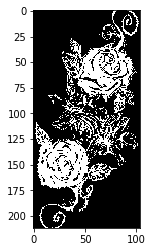

In [477]:
plt.figure()
plt.imshow(im, interpolation='nearest', cmap=plt.cm.gray)
#plt.savefig('test.png')